# Reusing Randomness #

***Using One Form of Randomness to Generate Another***

It is often useful or necessary to transform one form of random data into another. This is so for times when one has the ability to generate data over some set of possibilities, but wants data over a different set of possibilities - for example, if you want to choose between three options you can roll a six-sided die and map 1 and 2 to the first option, 3 and 4 to the second, and 5 and 6 to the third.  

In the digital world, almost all randomness inherits from the "standard uniform distribution", the uniform distribution between zero and one (`rng.random()`). In math terms, we call this distribution $U(0,1)$, and if we generate a number $x$ from it we say $x$ is a "random variate" and write $x\sim U(0,1)$.

It turns out to be possible to use a $U(0,1)$ variate to generate samples from *any* distribution - but under the hood, `rng.random()` is really just a series of coin flips: `rng.random()` returns a 64-bit floating-point number, which contains 52 random ones and zeros. 

In the real world it is often possible to generate *discrete* random data, such as a coin flip. Other classic examples are dice: the essential ones are the pythagorean solids: 4-sided (d4), 6-sided (d6), 8-sided (d8), 12-sided (d12), and 20-sided (d20) shapes where all faces are symmetric with all other faces. Any single face is equally likely to land upright when thrown onto a flat surface. Other common dice include d10, d24, and d100. 

An $n$-sided die is most useful when choosing between $n$ options - but what if there are $m$ options? The question is, can one map the output of the dn to the output of a dm?

The answer is yes, with enough data from the dn, it is always possible to generate data indistinguishable from the output of a dm.

The idea is to map one or more of the $n$ possible outcomes from the dn to one of $m$ equally-likely options, and map those to the outputs of a dm. For example, rolling a d2 (a coin) on an even-sided die is easy - map odd numbers to heads, and even numbers to tails. Or rolling a d12 on a d6: roll a d6 twice, and if the second roll is a three or smaller you output is just the roll on the first dice, otherwise add 6. Your options are evenly spread from one to six 50% of the time, and the other 50% are spread from seven to twelve - just like a d12!

The classic example is rolling a d100 on 2d10:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rng = np.random.default_rng()

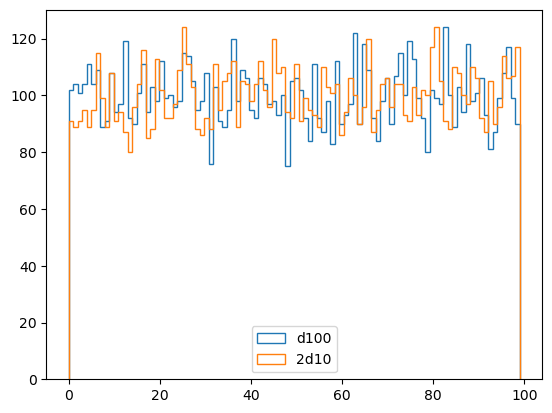

In [ ]:
N = 10_000

# roll a d100 N times
d100 = rng.integers(100, size = N)

# roll 2d10 N times
first_d10 = rng.integers(10, size = N)
second_d10 = rng.integers(10, size = N)

# use the first d10 as the first digit of a two-digit number, and the second d10 as the second digit
d100_on_d10 = first_d10*10 + second_d10

plt.figure()
plt.hist(d100, bins = 100, histtype = 'step', label = 'd100')
plt.hist(d100_on_d10, bins = 100, histtype = 'step', label = '2d10')
plt.legend()

Note quickly that here we generate from $0$ to $n-1$ rather than $1$ to $n$, as is found on most dice. This is essential for being able to combine the rolls as we did, with multiplying the first roll by ten and adding the second roll.

From now on, we'll define a uniform discrete random variable as $U_n$ if its outputs are evenly spread from $0$ to $n-1$. Then we have if $x_n\sim U_n$ and $x_m\sim U_m$ 

$$ mx_n + x_m \sim U_{(nm)}$$

Identically,

$$ nx_m + x_n \sim U_{(nm)}$$

On the other hand, if $n$ is an integer multiple of $m$:

$$x_n\% m \sim U_m $$

where $\%$ is the modulo (remainder) function 

In [40]:
# example: output of a d12 on a d3 and a d4
N = 10

d4 = rng.integers(4, size = N)
d3 = rng.integers(3, size = N)

print('d4: ', d4)
print('d3: ', d3)

d12 = 3*d4 + d3
print('d12:', d12)

d4:  [3 3 2 2 0 3 3 0 2 2]
d3:  [2 2 0 0 0 2 2 0 0 2]
d12: [11 11  6  6  0 11 11  0  6  8]


Back to the general case of wanting to generate dm on a dn, what if $n$ is not a multiple or factor of $m$? In that case we can still generate $m$ data points, but we unfortunately cannot avoid having to throw out some of our data. 

For example, generating a d5 on a d6:

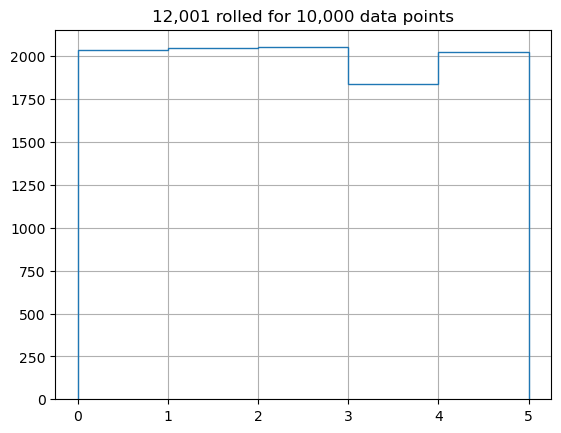

In [66]:
N = 10_000

d6 = rng.integers(6, size = N)
num_rolled = N
# if any are a five, reroll until they are all less than five
while any(d6 == 5):
    num_to_reroll = (d6 == 5).sum()
    d6[d6 == 5] = rng.integers(6, size = num_to_reroll)
    num_rolled += num_to_reroll

plt.figure()
plt.hist(d6, bins = range(6), histtype = 'step')
plt.title(f'{num_rolled:,.0f} rolled for {N:,.0f} data points')
plt.grid()